### Import

In [1]:
import json
import csv
import calendar
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from termcolor import colored
from gboml import GbomlGraph
from gboml.compiler.classes import Expression 
import argparse 
from statistics import mean
import seaborn  
import matplotlib.colors as mcolors
import matplotlib
from IPython.display import display

### Folder Location

In [2]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

belgian_data_folder = os.path.join(project_root, 'Data', 'Belgian_model')
simulation_folder = os.path.join(project_root, 'Simulations')
result_folder = os.path.join(project_root, 'Results')
template_folder = os.path.join(project_root, 'Templates')
model_folder = os.path.join(project_root, 'Models GBOML')

plot_folder = os.path.join(project_root, 'Plots')

sys.path.append(os.path.join(project_root, 'Modules'))

import GBOML_function as gf
import process_funct as pf

### Initialization of the dictionary 

- Where to save plot

In [3]:
scenario_plot_folder = os.path.join(project_root, 'Plots', 'Scenario model') 

- The dictionnaries:

In [4]:
# model_model_name = "scenario_base_from_model__1years.json.json"
model_name = "3_clusters_Belgium_base_case1year.json" 

In [5]:
# Import all the JSON files and transform them into dictionaries

model = gf.MakeMeReadable(gf.json.load(open(os.path.join(simulation_folder, model_name))))
model_dict = dict()  

file_path_base = simulation_folder + "\\" + model_name   
with open (file_path_base, 'r') as myfile:
    data_base = myfile.read()
model_dict = json.loads(data_base)

- Sensitive analysis:

In [6]:
# scenarios = ['base_case']
# sensitive = ['0']
# model_dict = dict()

# for scenario in scenarios:
#     model_dict[scenario] = dict()
#     for value in sensitive:
#         name_file = '2050_Belgium_model_base_case_efuels_and_17TWh_demand.json' 
#         file_path = 'C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/Clusters/' + name_file  # path to the json file
#         with open (file_path, 'r') as myfile:
#             data = myfile.read() 
#         dictionary = json.loads(data)
#         model_dict[scenario][value] = {}
#         model_dict[scenario][value] = dictionary

### Time horizon setting

In [7]:
time_horizon = model.model.horizon 

# Main


## Template

In [8]:
from process_funct import merge_dictionaries as merge
from process_funct import convert_mmr_to_dict as convert

- Variables 

In [9]:
e_variable = ['e_produced','e_consumed','e_discharged', 'e_charged', 'e_imported', 'e_exported', 'e_forward_out', 'e_reverse_in', 'e_curtailement','e_balanced']
h2_variable = ['h2_produced','h2_consumed','h2_discharged', 'h2_charged', 'h2_imported', 'h2_exported','h2_balanced']
co2_variable = ['co2_produced','co2_consumed','co2_discharged', 'co2_charged', 'co2_imported', 'co2_exported','co2_captured','co2_balanced']
ng_variable = ['ng_produced','ng_consumed','ng_discharged', 'ng_charged', 'ng_imported', 'ng_exported','ng_balanced']
h2o_variable = ['h2o_produced','h2o_consumed','h2o_discharged', 'h2o_charged', 'h2o_imported', 'h2o_exported','h2o_balanced']
dme_variable = ['dme_produced','dme_consumed','dme_discharged','dme_charged','dme_imported','dme_exported','dme_balanced']  
ethanol_variable = ['ethanol_produced','ethanol_consumed','ethanol_discharged','ethanol_charged','ethanol_imported','ethanol_exported','ethanol_balanced']
methanol_variable = ['methanol_produced','methanol_consumed','methanol_discharged','methanol_charged','methanol_imported','methanol_exported','methanol_balanced']
diesel_variable = ['diesel_produced','diesel_consumed','diesel_discharged','diesel_charged','diesel_imported','diesel_exported','diesel_balanced']
gasoline_variable = ['gasoline_produced','gasoline_consumed','gasoline_discharged','gasoline_charged','gasoline_imported','gasoline_exported','gasoline_balanced']
kerosene_variable = ['kerosene_produced','kerosene_consumed','kerosene_discharged','kerosene_charged','kerosene_imported','kerosene_exported','kerosene_balanced']

- Parameter 

In [10]:
parameter = ['capex', 'fom', 'max_capacity', 'pre_installed_capacity']

- Global parameter (generally for demand)

In [11]:
e_demand = ['demand_el', 'demand_el_ht', 'demand_el_tr']  
h2_demand = ['demand_h2_industry','demand_h2_transport','demand_h2_transport2','demand_h2_heat']
ng_demand = ['demand_ng_industry','demand_ng_transport','demand_ng_transport2','demand_ng_heat']

### Dictionary

- model case:

In [12]:
model_e_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = e_variable, global_parameter= e_demand, to_print='no')
model_e_obj = gf.MakeMeReadable(model_e_dict)

model_h2_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = h2_variable, global_parameter= h2_demand, to_print='no')
model_h2_obj = gf.MakeMeReadable(model_h2_dict)

model_ng_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = ng_variable, global_parameter= ng_demand, to_print='no')
model_ng_obj = gf.MakeMeReadable(model_ng_dict)

model_co2_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = co2_variable, to_print='no')
model_co2_obj = gf.MakeMeReadable(model_co2_dict)

model_h2o_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = h2o_variable, to_print='no')
model_h2o_obj = gf.MakeMeReadable(model_h2o_dict)

model_dme_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = dme_variable, to_print='no')
model_dme_obj = gf.MakeMeReadable(model_dme_dict)

model_ethanol_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = ethanol_variable, to_print='no')
model_ethanol_obj = gf.MakeMeReadable(model_ethanol_dict)

model_methanol_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = methanol_variable, to_print='no')
model_methanol_obj = gf.MakeMeReadable(model_methanol_dict)

model_diesel_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = diesel_variable, to_print='no')
model_diesel_obj = gf.MakeMeReadable(model_diesel_dict)

model_gasoline_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = gasoline_variable, to_print='no')
model_gasoline_obj = gf.MakeMeReadable(model_gasoline_dict)

model_kerosene_dict = pf.get_all_from_variable_and_parameter(model_dict, variable = kerosene_variable, to_print='no')
model_kerosene_obj = gf.MakeMeReadable(model_kerosene_dict)

### Capacity check

In [13]:
test = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(model_co2_obj.variables.INLAND)) 

,co2_produced,co2_consumed,co2_captured,co2_balanced
BIOMASS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
CCGT,"[2.6445904177277595, 2.3876881013891382, 2.243...",NaN,NaN,NaN
CHP,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
NUCLEAR,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
OCGT,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
SMR,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
WASTE,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN
METHANATION,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
BIOMETHANE,NaN,NaN,"[0.33383391256630673, 0.33383391256630673, 0.3...",NaN
DAC,NaN,NaN,"[0.7358922569985946, 0.7358922569985946, 0.735...",NaN


#### Basic commodities:

Electricity:


,BIOMASS (INLAND),CCGT (INLAND),CHP (INLAND),FUEL_CELLS (INLAND),NUCLEAR (INLAND),OCGT (INLAND),PV (INLAND),WASTE (INLAND),WIND_ONSHORE (INLAND),FUEL_CELLS (OFFSHORE),WIND_OFFSHORE (OFFSHORE)
Preinstalled capacity,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Added capacity,0.0,11.904929,0.0,0.0,0.0,0.0,28.324097,0.0,9.0,0.0,8.0
Total capacity,0.0,11.904929,0.0,0.0,0.0,0.0,28.324097,0.0,9.0,0.0,8.0
Max capacity,0.0,100.000000,0.0,100.0,0.0,100.0,50.000000,0.0,9.0,100.0,8.0


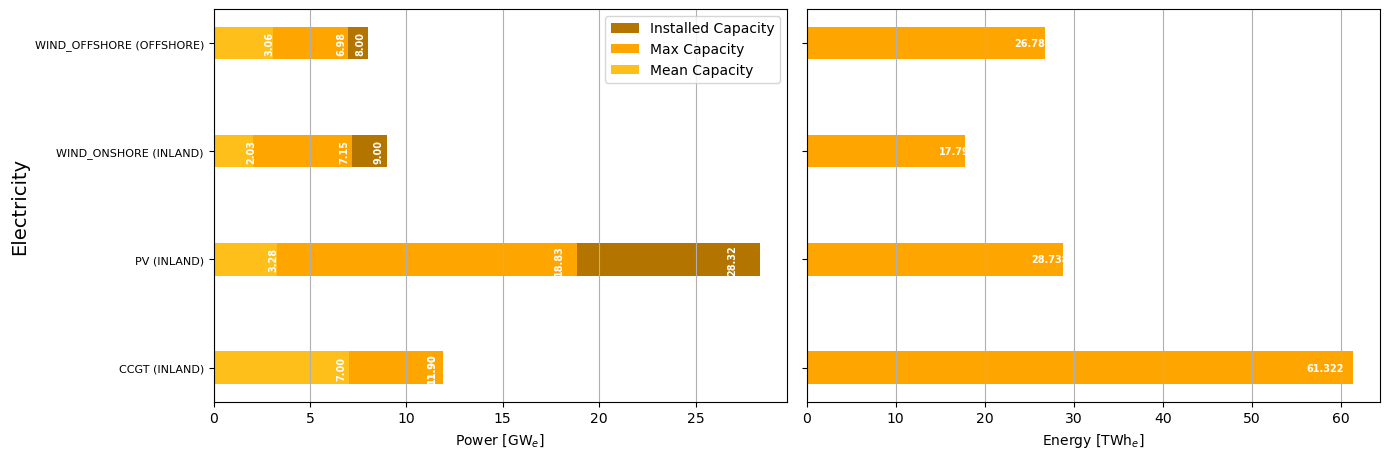

Gas:


,BIOMETHANE (INLAND),METHANATION (INLAND)
Preinstalled capacity,0.000000,0.0
Added capacity,1.652643,0.0
Total capacity,1.652643,0.0
Max capacity,2.411048,100.0


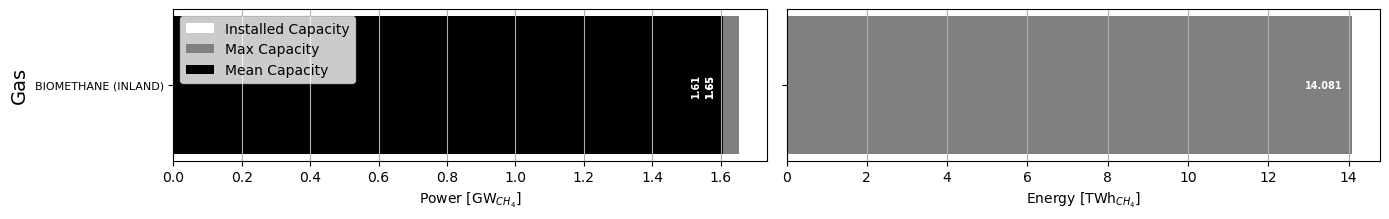

Hydrogen:


,ELECTROLYSIS_PLANTS (INLAND),SMR (INLAND),ELECTROLYSIS_PLANTS (ZEEBRUGGE),ELECTROLYSIS_PLANTS (OFFSHORE)
Preinstalled capacity,0.0,0.0,0.000000,0.000000
Added capacity,0.0,0.0,0.972745,0.086473
Total capacity,0.0,0.0,0.972745,0.086473
Max capacity,100.0,100.0,100.000000,100.000000


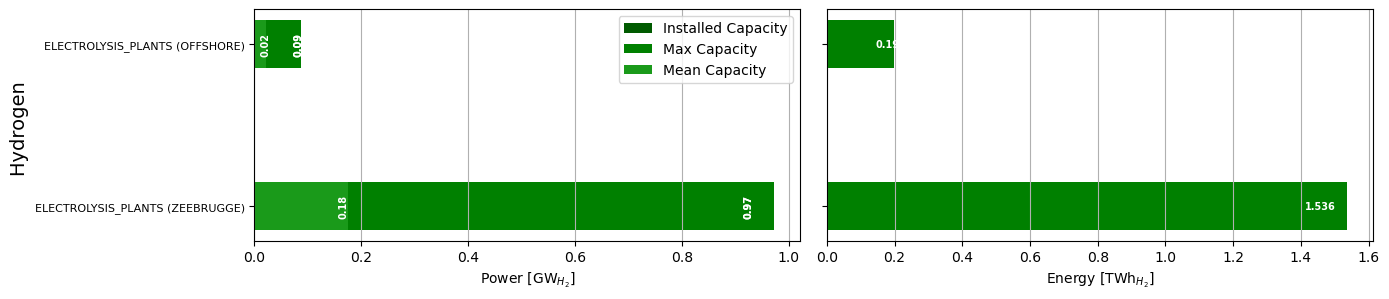

Carbon dioxide:


,BIOMETHANE (INLAND),DAC (INLAND),PCCC_BM (INLAND),PCCC_CCGT (INLAND),PCCC_CHP (INLAND),PCCC_OCGT (INLAND),PCCC_SMR (INLAND),PCCC_WS (INLAND)
Preinstalled capacity,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
Added capacity,1.652643,0.735892,0.0,2.520886,0.0,0.0,0.0,0.0
Total capacity,1.652643,0.735892,0.0,2.520886,0.0,0.0,0.0,0.0
Max capacity,2.411048,3.500000,5.0,5.000000,5.0,5.0,5.0,5.0


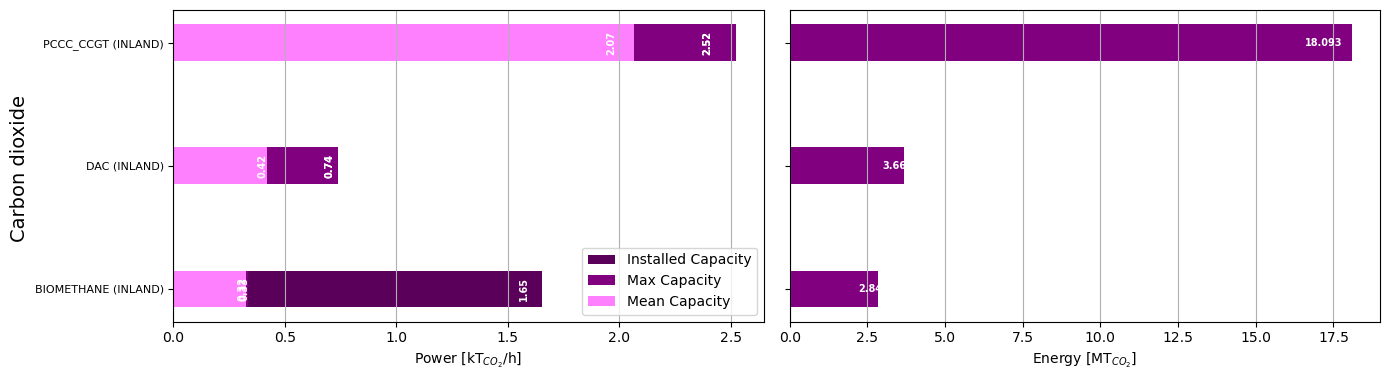

Water:


,DESALINATION (OFFSHORE),FUEL_CELLS (OFFSHORE)
Preinstalled capacity,0,0.0
Added capacity,0.006088,0.0
Total capacity,0.006088,0.0
Max capacity,Not given,100.0


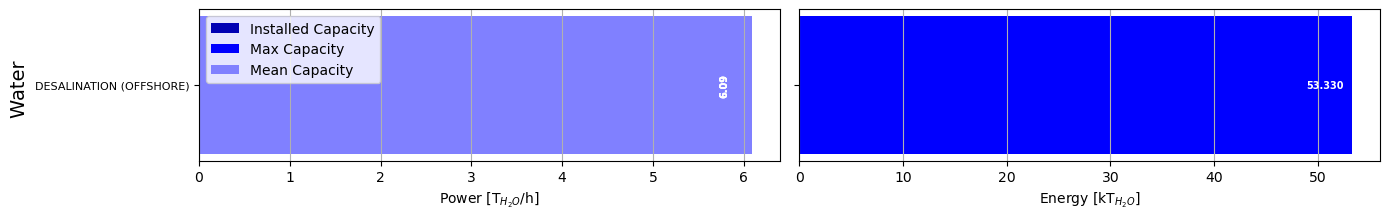

In [14]:
print(colored('Electricity:','black','on_magenta'))

model_e_energy = merge(convert(model_e_obj.variables.INLAND.e_produced), convert(model_e_obj.variables.OFFSHORE.e_produced), name=['INLAND' , 'OFFSHORE'])
model_e_cap = merge(convert(model_e_obj.capacities.INLAND.e_produced), convert(model_e_obj.capacities.OFFSHORE.e_produced), name=['INLAND' , 'OFFSHORE'])
model_e_cap_table = pf.transform_dict_into_table_several_column(model_e_cap)

model_e_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_e_energy, capacity_dict= model_e_cap,
                        unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

# model_e_prod_cap_table = pf.transform_dict_into_table_several_column(model_e_prod_cap)

pf.bar_ploter_stack_dict(data=model_e_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_e$]', ener_unit = 'Energy [TWh$_e$]', is_energy= 'no', is_power= 'no',
                        commodity = 'Electricity', plot_folder = scenario_plot_folder) 



print(colored('Gas:','black','on_magenta'))

model_ng_energy = merge(convert(model_ng_obj.variables.INLAND.ng_produced),name=['INLAND' ])
model_ng_cap = merge(convert(model_ng_obj.capacities.INLAND.ng_produced),name=['INLAND' ])  
model_ng_cap_table = pf.transform_dict_into_table_several_column(model_ng_cap)

model_ng_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_ng_energy,  capacity_dict= model_ng_cap,
                        unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

# model_ng_prod_cap_table = pf.transform_dict_into_table_several_column(model_ng_prod_cap)

pf.bar_ploter_stack_dict(data=model_ng_prod_cap, color_palette = 'grey', cap_unit = 'Power [GW$_{CH_4}$]', ener_unit = 'Energy [TWh$_{CH_4}$]', is_energy= 'no', is_power= 'no',
                        commodity = 'Gas', plot_folder = scenario_plot_folder) 


print(colored('Hydrogen:','black','on_magenta'))

model_h2_energy = merge(convert(model_h2_obj.variables.INLAND.h2_produced), convert(model_h2_obj.variables.ZEEBRUGGE.h2_produced) , convert(model_h2_obj.variables.OFFSHORE.h2_produced), name=['INLAND', 'ZEEBRUGGE', 'OFFSHORE'])
model_h2_cap = merge(convert(model_h2_obj.capacities.INLAND.h2_produced), convert(model_h2_obj.capacities.ZEEBRUGGE.h2_produced) , convert(model_h2_obj.capacities.OFFSHORE.h2_produced), name=['INLAND', 'ZEEBRUGGE', 'OFFSHORE'])
model_h2_cap_table = pf.transform_dict_into_table_several_column(model_h2_cap)

model_h2_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_h2_energy, capacity_dict= model_h2_cap,
                        unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

# model_h2_prod_cap = pf.transform_dict_into_table_several_column(model_h2_prod_cap)

pf.bar_ploter_stack_dict(data=model_h2_prod_cap, color_palette = 'green', cap_unit = 'Power [GW$_{H_2}$]', ener_unit = 'Energy [TWh$_{H_2}$]', is_energy= 'no', is_power= 'no',
                         commodity = 'Hydrogen ', plot_folder = scenario_plot_folder) 


print(colored('Carbon dioxide:','black','on_magenta'))

model_co2_energy = merge(convert(model_co2_obj.variables.INLAND.co2_captured), name=['INLAND'])
model_co2_cap = merge(convert(model_co2_obj.capacities.INLAND.co2_captured), name=['INLAND'])
model_co2_cap_table = pf.transform_dict_into_table_several_column(model_co2_cap)

model_co2_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_co2_energy, capacity_dict= model_co2_cap,
                        unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

# model_co2_prod_cap = pf.transform_dict_into_table_several_column(model_co2_prod_cap)

pf.bar_ploter_stack_dict(data=model_co2_prod_cap, color_palette = 'purple', cap_unit = 'Power [kT$_{CO_2}$/h]', ener_unit = 'Energy [MT$_{CO_2}$]', is_energy= 'no', is_power= 'no',
                        commodity = 'Carbon dioxide ', plot_folder = scenario_plot_folder) 



print(colored('Water:','black','on_magenta'))

model_h2o_energy = merge(convert(model_h2o_obj.variables.OFFSHORE.h2o_produced), name=['OFFSHORE'])
model_h2o_cap = merge(convert(model_h2o_obj.capacities.OFFSHORE.h2o_produced), name=['OFFSHORE'])
model_h2o_cap_table = pf.transform_dict_into_table_several_column(model_h2o_cap)

model_h2o_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_h2o_energy, capacity_dict= model_h2o_cap,
                        unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')

# model_h2o_prod_cap = pf.transform_dict_into_table_several_column(model_h2o_prod_cap)

pf.bar_ploter_stack_dict(data=model_h2o_prod_cap, color_palette = 'blue', cap_unit = 'Power [T$_{H_2O}$/h]', ener_unit = 'Energy [kT$_{H_2O}$]', is_energy= 'no', is_power= 'no',
                        commodity = 'Water ', multiply=1000, plot_folder = scenario_plot_folder) 


#### Efuels

In [26]:
print(colored('DME:','black','on_magenta'))

try:
    model_dme_energy = merge(convert(model_dme_obj.variables.INLAND.dme_produced), convert(model_dme_obj.variables.OFFSHORE.dme_produced), name=['INLAND' , 'OFFSHORE'])
    model_dme_cap = merge(convert(model_dme_obj.capacities.INLAND.dme_produced), convert(model_dme_obj.capacities.OFFSHORE.dme_produced), name=['INLAND' , 'OFFSHORE'])
    model_dme_cap_table = pf.transform_dict_into_table_several_column(model_dme_cap)

    model_dme_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_dme_energy, capacity_dict= model_dme_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')
 

    pf.bar_ploter_stack_dict(data=model_dme_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{DME}$]', ener_unit = 'Energy [TWh$_{DME}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'DME', plot_folder = scenario_plot_folder) 
    
except Exception as e:
    print("⚠️ Skipping DME block – dictionary is empty or invalid:", str(e))
    print('')
    
    
print(colored('Ethanol:','black','on_magenta'))

try:
    model_ethanol_energy = merge(convert(model_ethanol_obj.variables.INLAND.ethanol_produced), convert(model_ethanol_obj.variables.OFFSHORE.ethanol_produced), name=['INLAND' , 'OFFSHORE'])
    model_ethanol_cap = merge(convert(model_ethanol_obj.capacities.INLAND.ethanol_produced), convert(model_ethanol_obj.capacities.OFFSHORE.ethanol_produced), name=['INLAND' , 'OFFSHORE'])
    model_ethanol_cap_table = pf.transform_dict_into_table_several_column(model_ethanol_cap)

    model_ethanol_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_ethanol_energy, capacity_dict= model_ethanol_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no')
 

    pf.bar_ploter_stack_dict(data=model_ethanol_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Ethanol}$]', ener_unit = 'Energy [TWh$_{Ethanol}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Ethanol', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Ethanol block – dictionary is empty or invalid:", str(e))
    print('')
    
    
print(colored('Methanol:','black','on_magenta'))

try:
    model_methanol_energy = merge(convert(model_methanol_obj.variables.INLAND.methanol_produced), convert(model_methanol_obj.variables.OFFSHORE.methanol_produced), name=['INLAND' , 'OFFSHORE'])
    model_methanol_cap = merge(convert(model_methanol_obj.capacities.INLAND.methanol_produced), convert(model_methanol_obj.capacities.OFFSHORE.methanol_produced), name=['INLAND' , 'OFFSHORE'])
    model_methanol_cap_table = pf.transform_dict_into_table_several_column(model_methanol_cap)

    model_methanol_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_methanol_energy, capacity_dict= model_methanol_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no') 

    pf.bar_ploter_stack_dict(data=model_methanol_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Methanol}$]', ener_unit = 'Energy [TWh$_{Methanol}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Methanol', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Methanol block – dictionary is empty or invalid:", str(e))
    print('')
    
    
print(colored('Diesel:','black','on_magenta'))

try:
    model_diesel_energy = merge(convert(model_diesel_obj.variables.INLAND.diesel_produced), convert(model_diesel_obj.variables.OFFSHORE.diesel_produced), name=['INLAND' , 'OFFSHORE'])
    model_diesel_cap = merge(convert(model_diesel_obj.capacities.INLAND.diesel_produced), convert(model_diesel_obj.capacities.OFFSHORE.diesel_produced), name=['INLAND' , 'OFFSHORE'])
    model_diesel_cap_table = pf.transform_dict_into_table_several_column(model_diesel_cap)
    
    model_diesel_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_diesel_energy, capacity_dict= model_diesel_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no') 
    
    pf.bar_ploter_stack_dict(data=model_diesel_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Diesel}$]', ener_unit = 'Energy [TWh$_{Diesel}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Diesel', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Diesel block – dictionary is empty or invalid:", str(e))
    print('')    
    
    
print(colored('Gasoline:','black','on_magenta'))

try:
    model_gasoline_energy = merge(convert(model_gasoline_obj.variables.INLAND.gasoline_produced), convert(model_gasoline_obj.variables.OFFSHORE.gasoline_produced), name=['INLAND' , 'OFFSHORE'])
    model_gasoline_cap = merge(convert(model_gasoline_obj.capacities.INLAND.gasoline_produced), convert(model_gasoline_obj.capacities.OFFSHORE.gasoline_produced), name=['INLAND' , 'OFFSHORE'])
    model_gasoline_cap_table = pf.transform_dict_into_table_several_column(model_gasoline_cap)

    model_gasoline_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_gasoline_energy, capacity_dict= model_gasoline_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no') 

    pf.bar_ploter_stack_dict(data=model_gasoline_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Gasoline}$]', ener_unit = 'Energy [TWh$_{Gasoline}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Gasoline', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Gasoline block – dictionary is empty or invalid:", str(e))
    print('')
    

print(colored('Kerosene:','black','on_magenta'))

try:
    model_kerosene_energy = merge(convert(model_kerosene_obj.variables.INLAND.kerosene_produced), convert(model_kerosene_obj.variables.OFFSHORE.kerosene_produced), name=['INLAND' , 'OFFSHORE'])
    model_kerosene_cap = merge(convert(model_kerosene_obj.capacities.INLAND.kerosene_produced), convert(model_kerosene_obj.capacities.OFFSHORE.kerosene_produced), name=['INLAND' , 'OFFSHORE'])
    model_kerosene_cap_table = pf.transform_dict_into_table_several_column(model_kerosene_cap)

    model_kerosene_prod_cap = pf.cap_pow_energy_dict(energy_dict= model_kerosene_energy, capacity_dict= model_kerosene_cap,
                            unit_power = '[GW]', unit_energy = '[TWh]', total_return = 'no') 

    pf.bar_ploter_stack_dict(data=model_kerosene_prod_cap, color_palette = 'orange', cap_unit = 'Power [GW$_{Kerosene}$]', ener_unit = 'Energy [TWh$_{Kerosene}$]', is_energy= 'no', is_power= 'no',
                            commodity = 'Kerosene', plot_folder = scenario_plot_folder)
except Exception as e:
    print("⚠️ Skipping Kerosene block – dictionary is empty or invalid:", str(e))
    print('')   


DME:
⚠️ Skipping DME block – dictionary is empty or invalid: 'dict' object has no attribute 'dme_produced'

Ethanol:
⚠️ Skipping Ethanol block – dictionary is empty or invalid: 'dict' object has no attribute 'ethanol_produced'

Methanol:
⚠️ Skipping Methanol block – dictionary is empty or invalid: 'dict' object has no attribute 'methanol_produced'

Diesel:
⚠️ Skipping Diesel block – dictionary is empty or invalid: 'dict' object has no attribute 'diesel_produced'

Gasoline:
⚠️ Skipping Gasoline block – dictionary is empty or invalid: 'dict' object has no attribute 'gasoline_produced'

Kerosene:
⚠️ Skipping Kerosene block – dictionary is empty or invalid: 'dict' object has no attribute 'kerosene_produced'

